## Import Dependencies 
  - Importing libraries for using them

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics # for accuracy and precision in model evaluation

Finding Current Working Directory 

In [6]:
print(os.getcwd())

/content


## Data Collection and Preprocessing 
  - Download Vehicle dataset from kaggle website 

In [7]:
# Loading the data from csv file to pandas data frame
car_dataset = pd.read_csv("/content/car data.csv" , na_filter = True)

In [8]:
# Inspecting the first 5 rows of dataset 
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# checking the number of rows and columns in dataset
car_dataset.shape

(301, 9)

In [10]:
# Inspecting the last 10 rows of dataset 
car_dataset.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [11]:
# getting information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
# Finding Missing values in dataset
 
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
# Total null or missing values

car_dataset.isnull().sum().sum()

0

In [14]:
car_dataset.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0


In [15]:
# Checking the distribution of categorical data 
print(car_dataset.Car_Name.value_counts().head(10),"\n")
print(car_dataset.Fuel_Type.value_counts(),"\n")
print(car_dataset.Seller_Type.value_counts(),"\n")
print(car_dataset.Transmission.value_counts(),"\n")

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: Car_Name, dtype: int64 

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64 



## Encoding the Categorical data 

In [16]:
# Encoding the data 'Fuel_type' Column
# Inplace is true as we have to change actual data rather than copy of data in dataset

car_dataset.replace({'Fuel_Type' :{'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2 }} , inplace = True)
car_dataset.Fuel_Type.head(10)

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: Fuel_Type, dtype: int64

In [17]:
# Encoding the data 'Seller_type' Column

car_dataset.replace({'Seller_Type' :{'Dealer' : 0, 'Individual' : 1 }} , inplace = True)
car_dataset.Seller_Type.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Seller_Type, dtype: int64

In [18]:
# Encoding the data 'Transmission' Column

car_dataset.replace({'Transmission' :{'Manual' : 0, 'Automatic' : 1 }} , inplace = True)
car_dataset.Transmission.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Transmission, dtype: int64

In [19]:
car_dataset.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0


## Splitting the data into Training and Test data 

In [23]:
X = car_dataset.drop({'Car_Name' , 'Selling_Price'}, axis =1)
Y = car_dataset['Selling_Price']

In [26]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [25]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Splitting data into training and test data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 2 )

In [28]:
X_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0
290,2014,6.400,19000,0,0,0,0
35,2011,7.740,49998,2,0,0,0
7,2015,8.610,33429,1,0,0,0
183,2013,0.470,21000,0,1,0,0
13,2015,7.710,26000,0,0,0,0


## Training Model using Regresion model

In [30]:
# Loading Linear Regression Model
lr_model = LinearRegression()

In [31]:
lr_model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation in Linear Regression

In [36]:
# Prediction based on Training Data 
tr_data_prediction = lr_model.predict(X_train)
# tr_data_prediction

In [40]:
# R squared Error for Training data

error_score = metrics.r2_score(Y_train, tr_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.8799451660493711


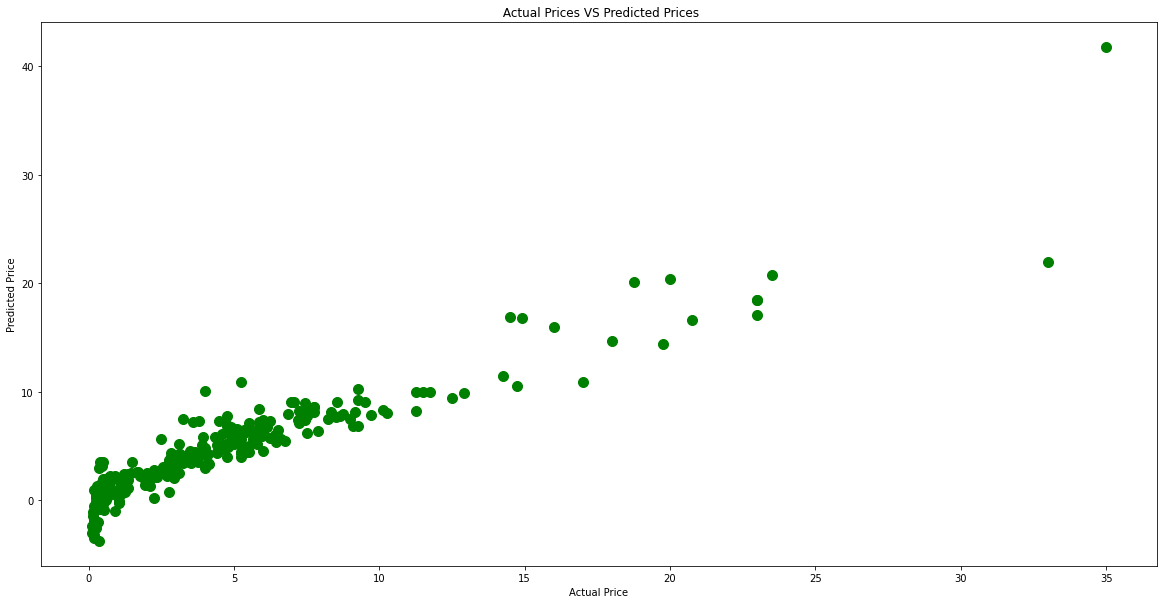

In [59]:
# Plot predicted and actual prices of model
# Both must be close to each other

plt.figure(figsize=(20,10))
plt.scatter(Y_train, tr_data_prediction, s =100, color = 'green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()

In [54]:
# Prediction based on Test Data 
test_data_prediction = lr_model.predict(X_test)
# test_data_prediction

In [56]:
# R squared Error for Test data

error_score_1 = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score_1)


R squared error :  0.8365766715027051


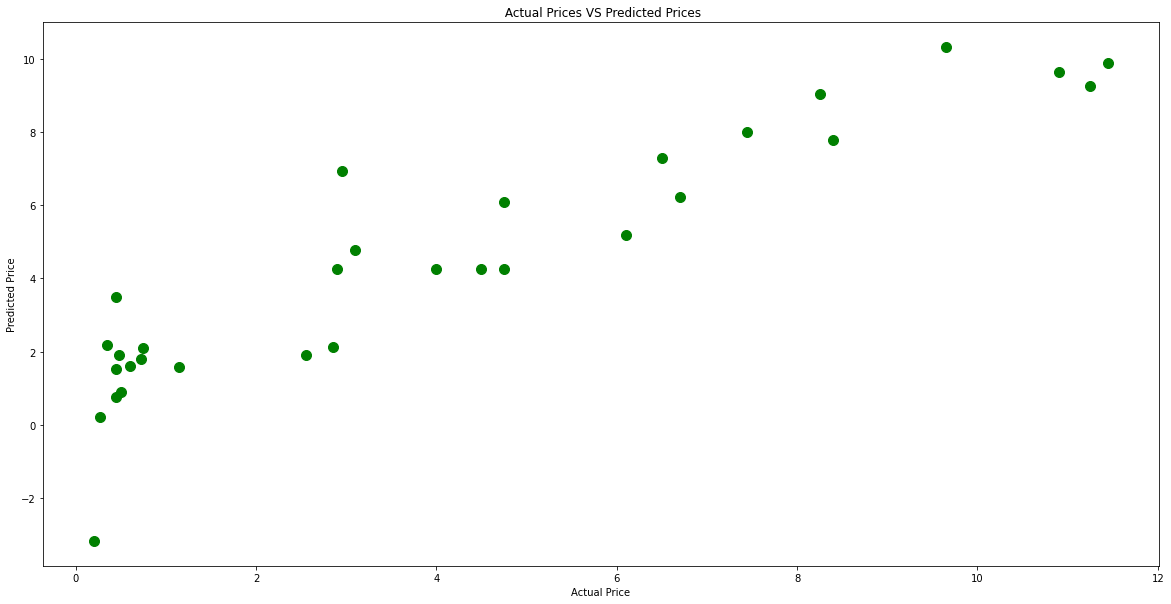

In [58]:
# Plot predicted and actual prices of model using test data
# Both must be close to each other

plt.figure(figsize=(20,10))
plt.scatter(Y_test, test_data_prediction , s =100, color = 'green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()

## Using Lasso Regression

In [60]:
# Loading Linear Regression Model
lasso_model = Lasso()

In [61]:
lasso_model.fit(X_train, Y_train)

Lasso()

### Model Evaluation in Lasso Regression

In [62]:
# Prediction based on Training Data 
tr_data_prediction = lasso_model.predict(X_train)
# tr_data_prediction

In [63]:
# R squared Error for Training data

error_score = metrics.r2_score(Y_train, tr_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.8427856123435794


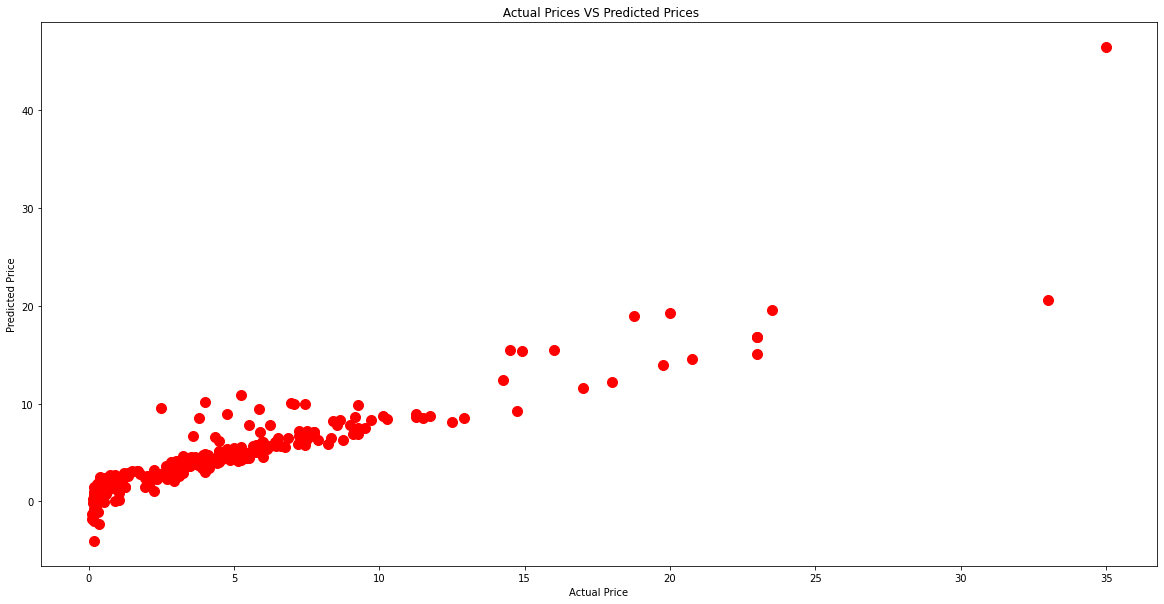

In [66]:
# Plot predicted and actual prices of model
# Both must be close to each other

plt.figure(figsize=(20,10))
plt.scatter(Y_train, tr_data_prediction, s =100, color = 'red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()

# Here we have better fit than Linear Regression 

In [68]:
# Prediction based on Test Data 
test_data_prediction = lasso_model.predict(X_test)
# test_data_prediction

In [69]:
# R squared Error for Test data

error_score_1 = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score_1)


R squared error :  0.8709167941173195


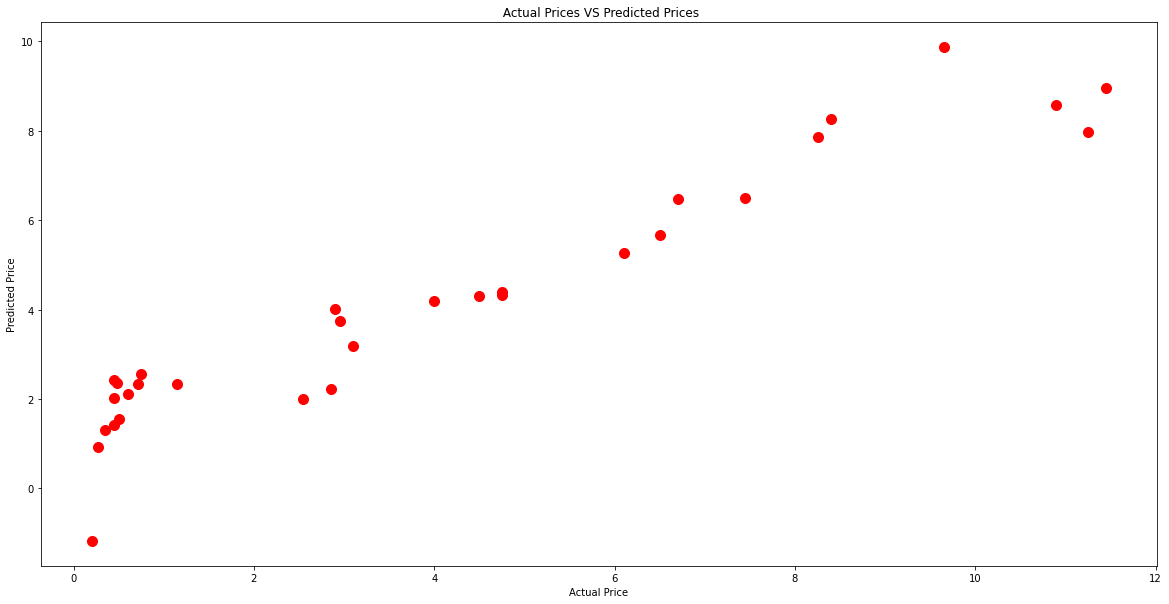

In [70]:
# Plot predicted and actual prices of model using test data
# Both must be close to each other

plt.figure(figsize=(20,10))
plt.scatter(Y_test, test_data_prediction , s =100, color = 'red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()

#### Hence we have created Car Price Prediction Model using both Linear Regression and Lasso Regression